# Dataset Exploration

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
np.set_printoptions(linewidth=np.inf)  # noqa
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline

In [3]:
X, y = load_digits(return_X_y=True)

### Features

Each example contains 64 numerical features:

$\vec{x} = \begin{bmatrix}x_{1} & x_{2} & \dots & x_{64} \end{bmatrix}, \quad x_i \in [0;16] $

In [4]:
print(X[7].astype(int))

[ 0  0  7  8 13 16 15  1  0  0  7  7  4 11 12  0  0  0  0  0  8 13  1  0  0  4  8  8 15 15  6  0  0  2 11 15 15  4  0  0  0  0  0 16  5  0  0  0  0  0  9 15  1  0  0  0  0  0 13  5  0  0  0  0]


To reconstruct the image $I$ from $\vec{x}$, we need to reshape the vector to an $8\times8$ matrix:

$I = \begin{bmatrix}
x_{1} & x_{2} & \dots & x_{8} \\
x_{9} & x_{10} & \dots & x_{16} \\
\vdots & \vdots & \ddots & \vdots \\
x_{57} & x_{58} & \dots & x_{64}
\end{bmatrix}$

In [5]:
print(X[7].reshape(8, 8).astype(int))

[[ 0  0  7  8 13 16 15  1]
 [ 0  0  7  7  4 11 12  0]
 [ 0  0  0  0  8 13  1  0]
 [ 0  4  8  8 15 15  6  0]
 [ 0  2 11 15 15  4  0  0]
 [ 0  0  0 16  5  0  0  0]
 [ 0  0  9 15  1  0  0  0]
 [ 0  0 13  5  0  0  0  0]]


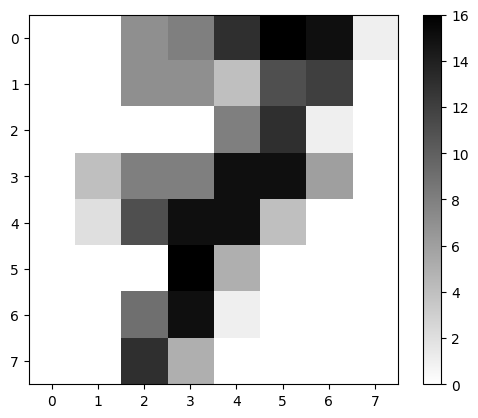

In [6]:
plt.imshow(X[7].reshape(8, 8), cmap="gray_r")
plt.gca().grid(which="major", visible=False)
plt.colorbar()
plt.show()

### Labels

Each image is associated with a label $y \in \set{0,1,\dots,9}$ representing the handwritten digit it contains.

In [7]:
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


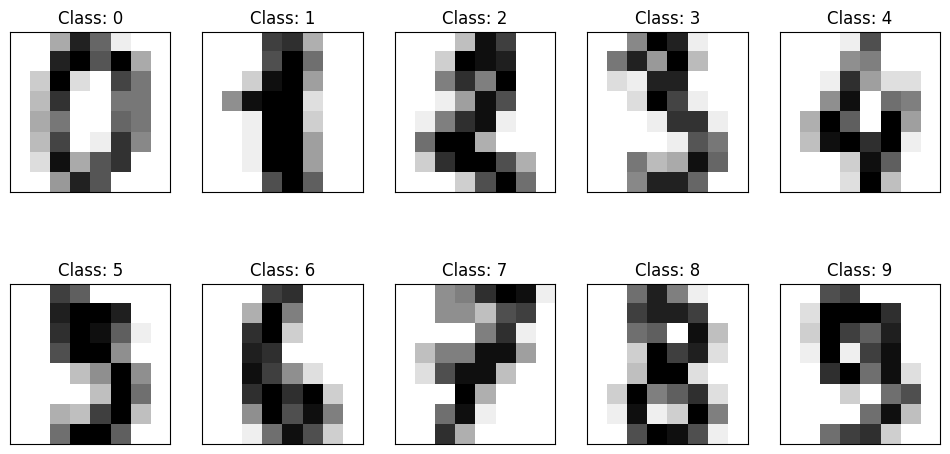

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    axes[i // 5, i % 5].imshow(X[i].reshape(8, 8), cmap="gray_r")
    axes[i // 5, i % 5].set_title(f"Class: {y[i]}")
    axes[i // 5, i % 5].grid(which="both", visible=False)
    axes[i // 5, i % 5].set_xticks([])
    axes[i // 5, i % 5].set_yticks([])

### Evaluation Metric

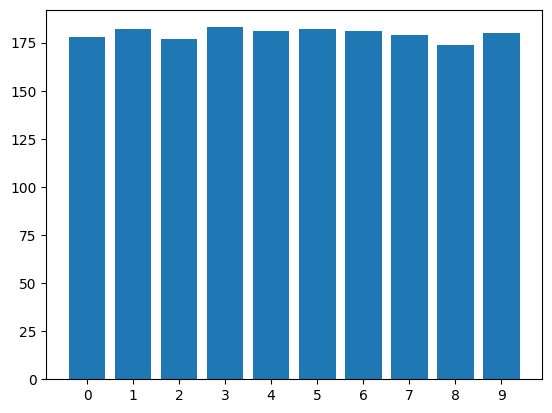

In [9]:
labels, counts = np.unique_counts(y)
plt.bar(labels, counts)
plt.xticks(labels)
plt.show()

Since the classes are uniformly distributed, accuracy is an appropriate metric for model evaluation.

$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{1}{N}{\sum_{i=1}^{N} \mathbb{1}(\hat{y}_i = y_i)}$